In [18]:
import os
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

In [11]:
from sklearn.model_selection import train_test_split

In [9]:
from mcmc_utils import *

In [6]:
fp = os.path.abspath('model_set.csv')
raw_df = pd.read_csv(fp)

# data transforms
raw_df["LogSalePrice"] = np.log(raw_df.SalePrice)
raw_df.CentralAir = [1 if i == "Y" else 0 for i in raw_df.CentralAir]
raw_df.YrSold = raw_df.YrSold - raw_df.YrSold.min()  # years from 2006
raw_df.YearBuilt = raw_df.YearBuilt - raw_df.YearBuilt.min()  # years from 1872

# drop unecessary cols
d_cols = ["Utilities"]
raw_df.drop(columns=d_cols, inplace=True)

In [12]:
# design matix
covariates = ["1stFlrSF", "LotArea"]
y = raw_df.LogSalePrice.values
X = raw_df.loc[:, covariates].values
n, p = X.shape

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1)


In [2]:
ppc_df = pd.read_csv("./posterior_pred_samps.csv")

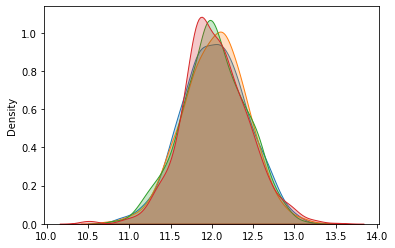

In [15]:
plot_posterior_dists(ppc_df.values[:,0], ppc_df.values[:,1], ppc_df.values[:,2], y_train)

In [56]:
y_train

array([11.8313792 , 11.38509209, 12.27839331, 12.36734079, 11.81303006,
       12.46997419, 11.70766954, 12.6181823 , 11.69940503, 12.17044547,
       11.70849225, 12.37581542, 11.9511804 , 12.36734079, 11.76718001,
       11.75587164, 11.71993963, 11.00209984, 11.68266824, 11.86358234,
       11.8493977 , 12.26904744, 12.32829028, 11.36210258, 11.84581988,
       11.77143616, 11.5228758 , 11.45899712, 13.04979268, 12.31268238,
       11.84222921, 12.19349386, 12.13215696, 12.07823927, 11.45105006,
       11.66134547, 11.99380721, 11.81303006, 12.23027733, 11.69441334,
       12.17044547, 12.16525065, 12.3327053 , 11.97665948, 12.14950229,
       12.03171926, 11.51292546, 11.81303006, 12.66032792, 11.48246626,
       11.85651517, 12.1281111 , 12.56024446, 12.17921519, 11.9511804 ,
       11.8493977 , 11.6784399 , 12.27373129, 12.46843691, 11.85651517,
       12.15477935, 11.74006104, 12.20557252, 12.31716669, 12.37158708,
       12.06104687, 11.40756495, 11.7745202 , 12.18586994, 12.33

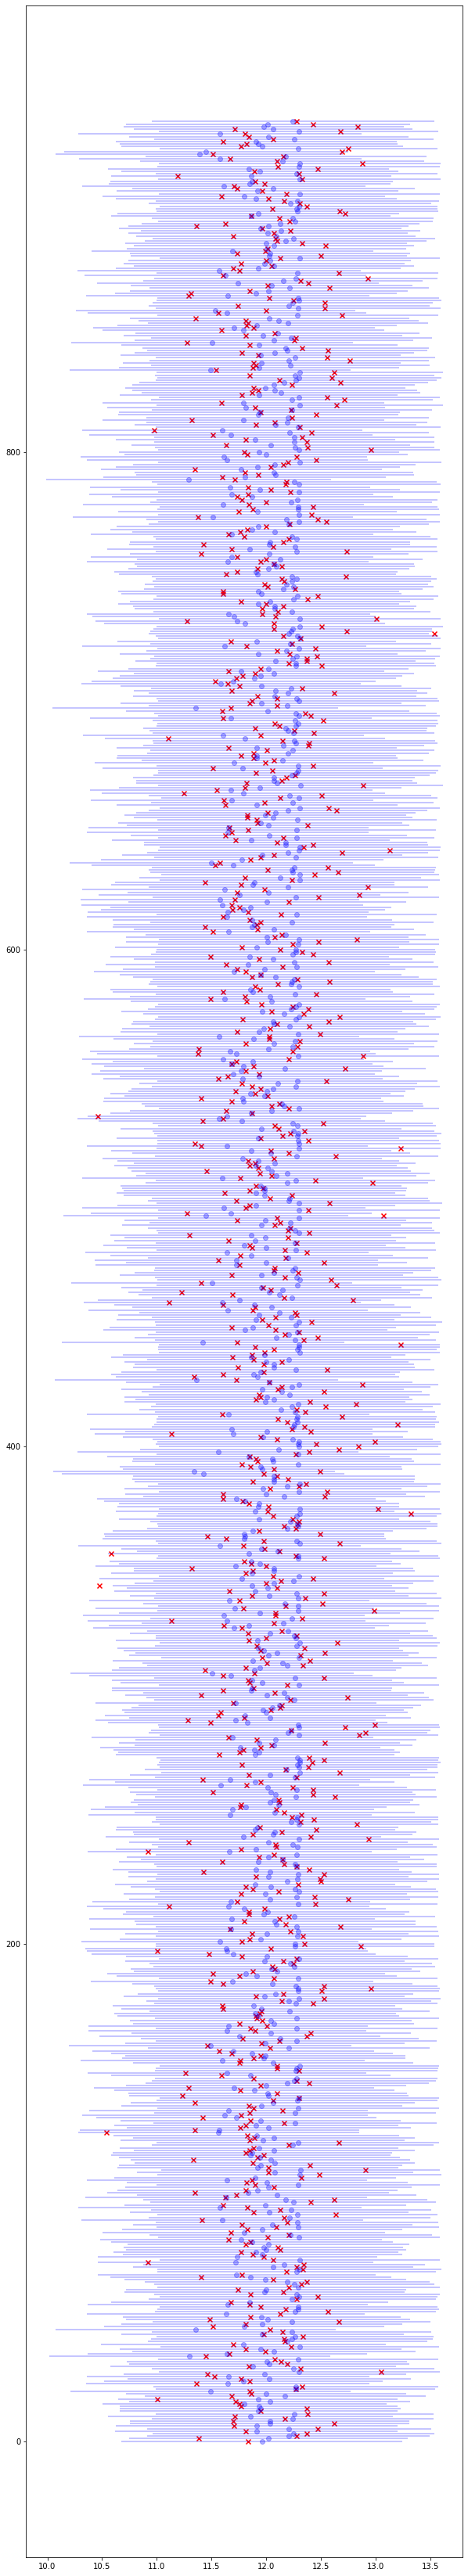

In [61]:
pred_hdis = az.hdi(ppc_df.values.T, hdi_prob=0.95)
e_bars = pred_hdis[:,1] - pred_hdis[:,0]
ppc_row_expect = ppc_df.values.mean(axis=1)
fig, ax = plt.subplots(figsize=(10, 60))
ax.scatter(y_train, range(y_train.size), c="red", marker="x")
ax.errorbar(x=ppc_row_expect, y=range(ppc_row_expect.size),
            xerr=e_bars, ecolor="blue", color="blue", fmt="o", alpha=0.3)
plt.show()

In [62]:
# calc RMSE
np.sqrt(((ppc_row_expect - y_train)**2).sum() / y_train.size)

0.32506338309541477